# Prima esercitazione: monte carlo e cammino casuale

Nella prima parte di questa esercitazione calcoliamo l'integrale 
\begin{eqnarray}\frac{\pi}{2}\int_0^1 \cos(\pi x/2) dx = 1\end{eqnarray}

con il metodo di monte carlo.

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

Campiono numericamente una distribuzione di probabilità con monte carlo:

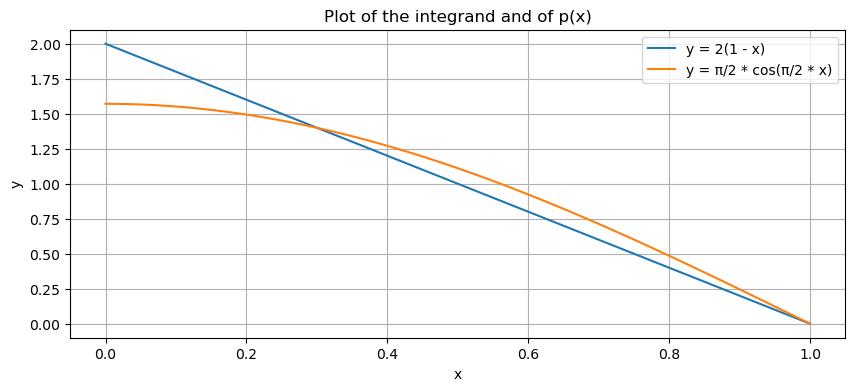

In [43]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)

y1 = 2 * (1 - x)
y2 = np.pi/2 * np.cos(np.pi/2 * x)

plt.figure(figsize=(10,4))
plt.plot(x, y1, label='y = 2(1 - x)')
plt.plot(x, y2, label='y = π/2 * cos(π/2 * x)')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Plot of the integrand and of p(x)')
plt.legend()

plt.grid(True)
plt.show()

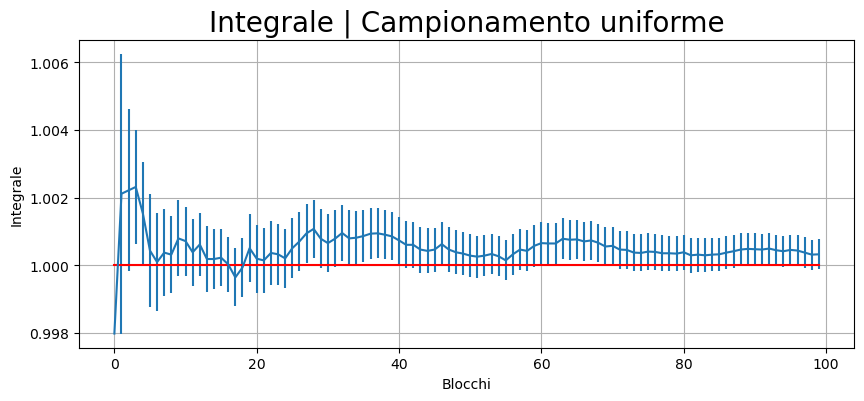

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

sum_prog, err_prog = np.loadtxt("risultati/campionamentoUniforme.txt", unpack=True)

N=sum_prog.shape[0]
x=np.arange(N)

pi_array = np.full(N, 1)

plt.figure(figsize=(10,4))
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Integrale | Campionamento uniforme", fontsize=20)
plt.plot(x, pi_array, label='pi', color="red")
plt.xlabel('Blocchi')
plt.ylabel('Integrale')
plt.grid(True)
plt.show()

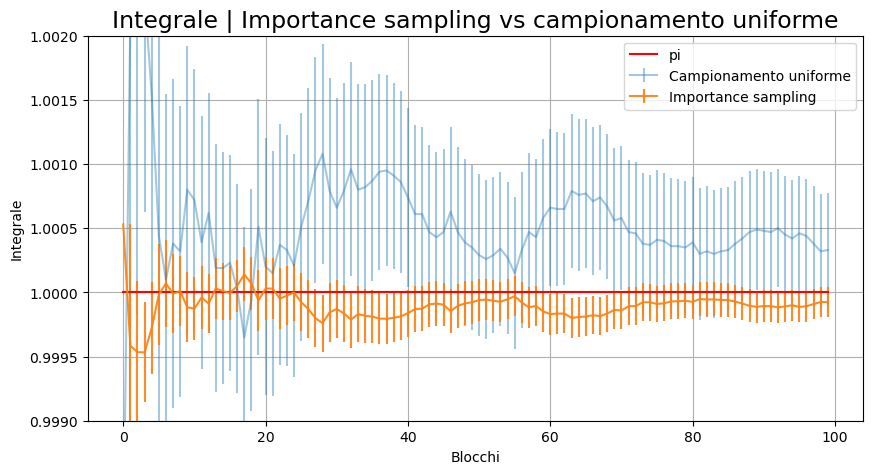

In [45]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

sum_prog, err_prog = np.loadtxt("risultati/importanceSampling.txt", unpack=True)
sum_progUn, err_progUn = np.loadtxt("risultati/campionamentoUniforme.txt", unpack=True)

N=sum_prog.shape[0]
x=np.arange(N)

plt.figure(figsize=(10,5))
plt.errorbar(x,sum_progUn,yerr=err_progUn,alpha=0.4, label="Campionamento uniforme")
plt.errorbar(x,sum_prog,yerr=err_prog,alpha=0.9, label="Importance sampling")
plt.title("Integrale | Importance sampling vs campionamento uniforme", fontsize=17)
plt.xlabel('Blocchi')
plt.ylabel('Integrale')
plt.plot(x, pi_array, label='pi', color="red")
plt.ylim([0.999,1.002])
plt.legend()
plt.grid(True)
plt.show()

# Cammino casuale su un reticolo


 --- Random Walk over a discrete lattice --- 
fit with k*sqrt(x): k =  [1.00503572]
confidence over k : +-  [[0.00018615]]


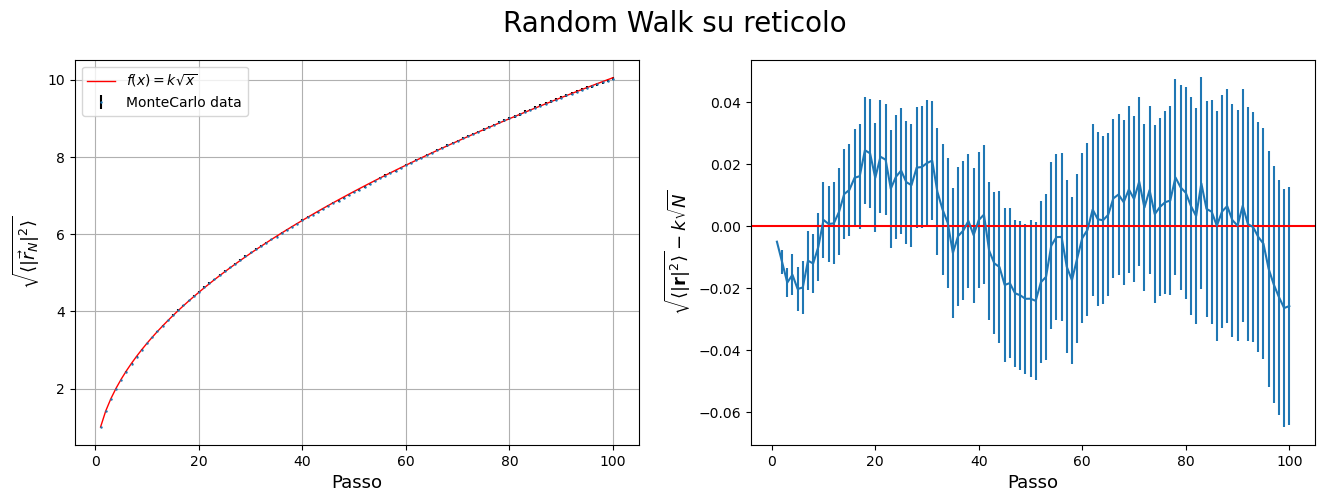

In [46]:
from scipy.optimize import curve_fit

def f (x, k):
    return k * np.sqrt(x)

yD, errD=np.loadtxt("risultati/camminoDiscreto.txt", unpack=True)

N=yD.shape[0]
x=np.arange(1,N+1)

#discrete fit
p_opt_disc, p_cov_disc = curve_fit(f, x, yD)
y_fit = f(x,p_opt_disc[0])

print( ' --- Random Walk over a discrete lattice --- ')
print('fit with k*sqrt(x): k = ',p_opt_disc)
print('confidence over k : +- ',np.sqrt(p_cov_disc))


plt.figure(figsize=(16,5))
plt.suptitle("Random Walk su reticolo",fontsize=20)


plt.subplot(1,2,1)
plt.errorbar(x,yD,errD,fmt='.',label='MonteCarlo data', markersize=1.5, ecolor="black")
y_fitD = f(x,p_opt_disc)
plt.plot(x,y_fitD,'r',linewidth=1,label='$f(x)=k\sqrt{x}$')

plt.grid(True)
plt.xlabel('Passo',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.legend()

#Differences
plt.subplot(1,2,2)
plt.errorbar(x, yD-f(x,*p_opt_disc), yerr = errD)

plt.xlabel('Passo', fontsize = 13)
plt.ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}-k\sqrt{N}$', fontsize = 13)
plt.axhline(y=0, color = 'r', linestyle = '-', linewidth = 1.5)

# Cammino casuale in uno spazio continuo

 --- Random Walk in a continuum space --- 
fit with k*sqrt(x): k = [1.00239421]
confidence over k : +- [[0.00019191]]


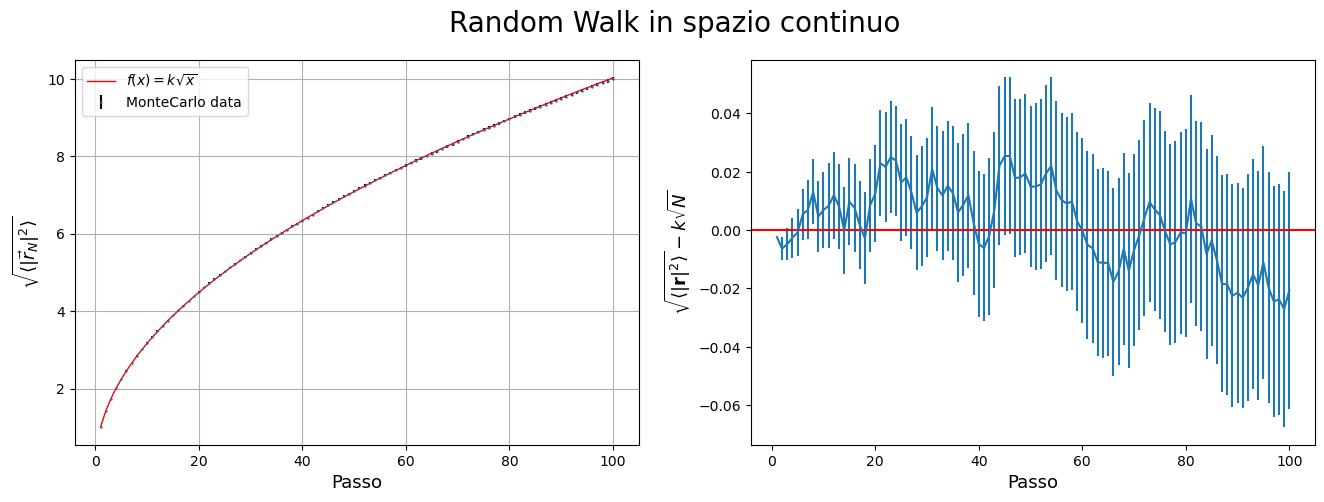

In [47]:
from scipy.optimize import curve_fit

def f (x, k):
    return k * np.sqrt(x)

yC, errC=np.loadtxt("risultati/camminoContinuo.txt", unpack=True)

N=yC.shape[0]
x=np.arange(1,N+1)

#continuous fit
p_opt_cont, p_cov_cont = curve_fit(f, x, yC)

print( ' --- Random Walk in a continuum space --- ')
print('fit with k*sqrt(x): k = '+str(p_opt_cont))
print('confidence over k : +- '+str(np.sqrt(p_cov_cont)))

plt.figure(figsize=(16,5))
plt.suptitle("Random Walk in spazio continuo",fontsize=20)


plt.subplot(1,2,1)
plt.errorbar(x,yC,errC,fmt='.',label='MonteCarlo data', markersize=1.5, ecolor="black")
y_fitC = f(x,p_opt_cont)
plt.plot(x,y_fitC,'r',linewidth=1,label='$f(x)=k\sqrt{x}$')

plt.grid(True)
plt.xlabel('Passo',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.legend()

#Differences
plt.subplot(1,2,2)
plt.errorbar(x, yC-f(x,*p_opt_cont), yerr = errC)

plt.xlabel('Passo', fontsize = 13)
plt.ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}-k\sqrt{N}$', fontsize = 13)
plt.axhline(y=0, color = 'r', linestyle = '-', linewidth = 1.5)
